# 7章データ可視化
## 西野泰平

### 7.1 静的2Dプロット

##### サンプルデータを作りプロットを始める前にインポートとカスタマイズを行います。

In [1]:
#matplotlibを別名mplでインボート
import matplotlib as mpl

In [2]:
#matplotlibのバージョン
mpl.__version__

'3.7.1'

In [3]:
#プロットパッケージを別名pltでインポート
import matplotlib.pyplot as plt

In [4]:
#プロットスタイル (https://bit.ly/2KaPFhs)をseabornにセット
plt.style.use('seaborn')

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20588\2516335955.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
#全プロットでフォントをserifにセット
mpl.rcParams['font.family'] ='serif'

In [6]:
%matplotlib inline

#### 1次元データセット

#### plt.plot()は基本的ですが強力なプロット関数です。普通は2つの数の集合を必要とします。

##### x値
##### x座標（横軸値）の listまたは配列
##### y値
##### y座標（縦軸値）の listまたは配列

##### x/y値の個数はもちろん同じです。次のコードの出力を図7-1に示します。

In [7]:
import numpy as np

In [8]:
#再現可能にするため乱数生成器のシードを固定
np.random.seed(1000)

In [9]:
#乱数を生成 (y値)
y = np.random.standard_normal(20)

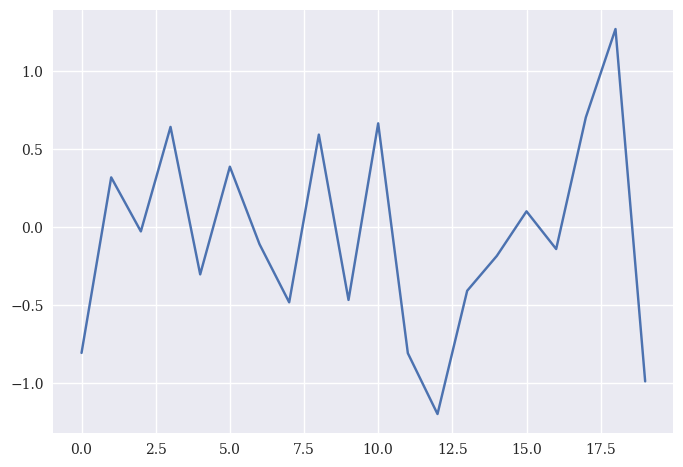

In [10]:
#固定整数値 (x値)(1行目)
#x/yオブジェクトでplt.plot()関数を呼び出す(2行目)(下の図7-1参照)
x = np.arange(len(y))
plt.plot(x, y);

##### plt.plot()はndarrayオブジェクトが渡されるとそれを理解します。この場合、x値は 「余分」な情報なので、不要です。y値だけなら plt.plot()はインデックス値をx値に使います。次の1行のコードで同じ出力（図7-2を参照）となります。

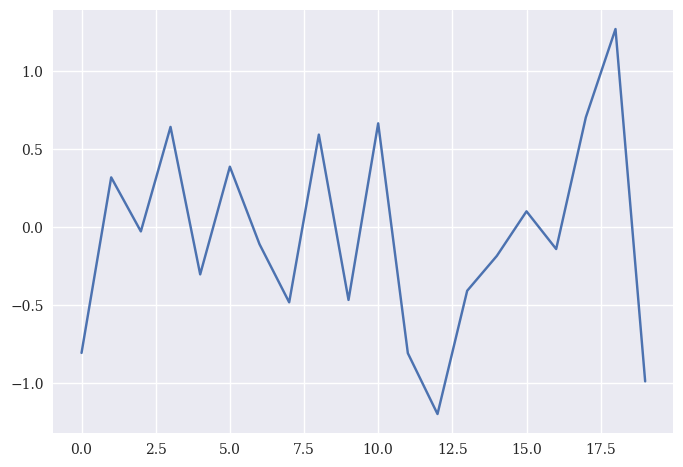

In [11]:
plt.plot(y);

##### ndarrayメソッドの大半がndarrayオブジェクトを返すので、オブジェクトにメソッド（場合によると複数個）を付けて渡せます。cumsum()メソッドをサンプルデータのndarrayオブジェクトで呼び出すと累積和が得られるので、別の出力となります（図7-3を参照）。

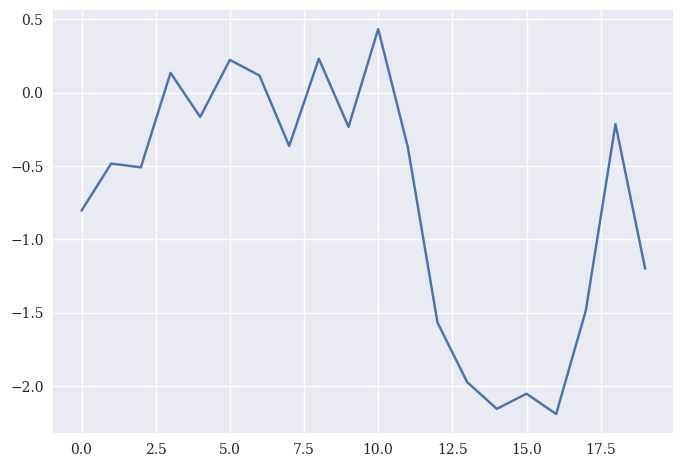

In [12]:
plt.plot(y.cumsum());

##### 一般に、デフォルトのプロットスタイルではレポートや報告書に要求される基準を満たしません。例えばフォントの変更（例： LaTeXフォントに合わせる）、軸のラベル、格子（グリッド）を読みやすく描くなどを行う必要があります。そこで、プロットスタイルの登場です。Matplotlibはプロットスタイルをカスタマイズする多数の関数も用意しています。簡単に使えるものもありますが、きちんと調べないといけないものもあります。例えば軸、格子、ラベルの関数の変更は簡単です（図7-4を参照）。

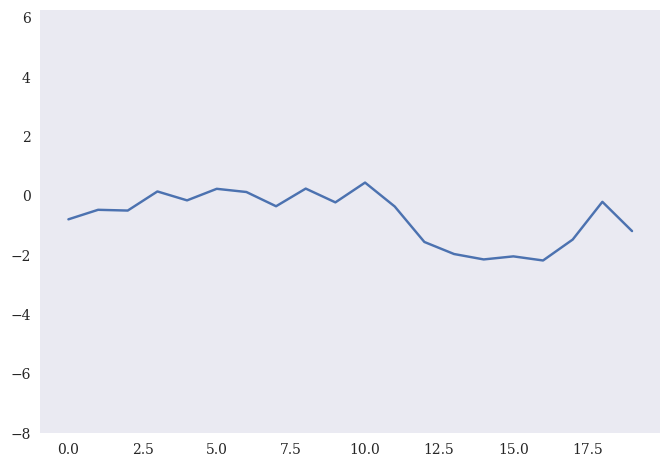

In [13]:
#格子線をなくす(2行目)
#軸のスケールを同じにする(3行目)
plt.plot(y.cumsum())
plt.grid(False)
plt. axis('equal'); 

##### さらに、plt.xlim()とplt.ylim()で軸の最大／最小値を直接設定できます。次のサンプルコードの出力を図7-5に示します。

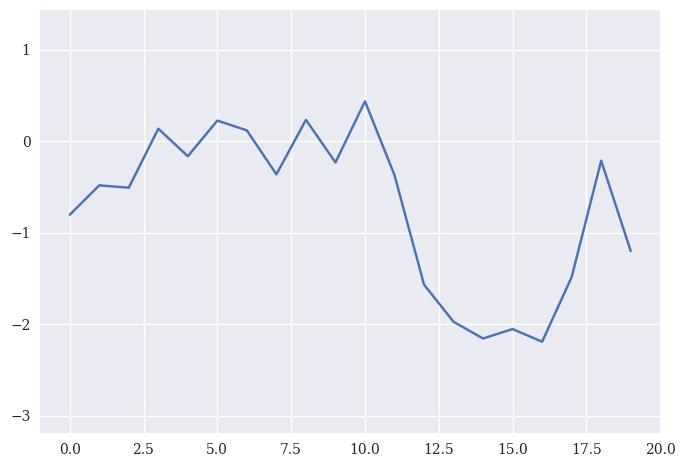

In [14]:
plt.plot(y.cumsum())
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum())-1,np.max(y.cumsum())+ 1);

##### 読みやすさのためにプロットには、表題、x値とy値のラベルなど多数の表示ができます。関数plt.title()、plt.xlabel()、plt.ylabel()はラベルを追加します。plot()はデフォルトでデータ点がばらばらでも実線でプロットします。離散プロットには別のスタイルを選びます。図7-6では、線幅1.5ポイントの（青い）線上に（赤い）点を描画します。

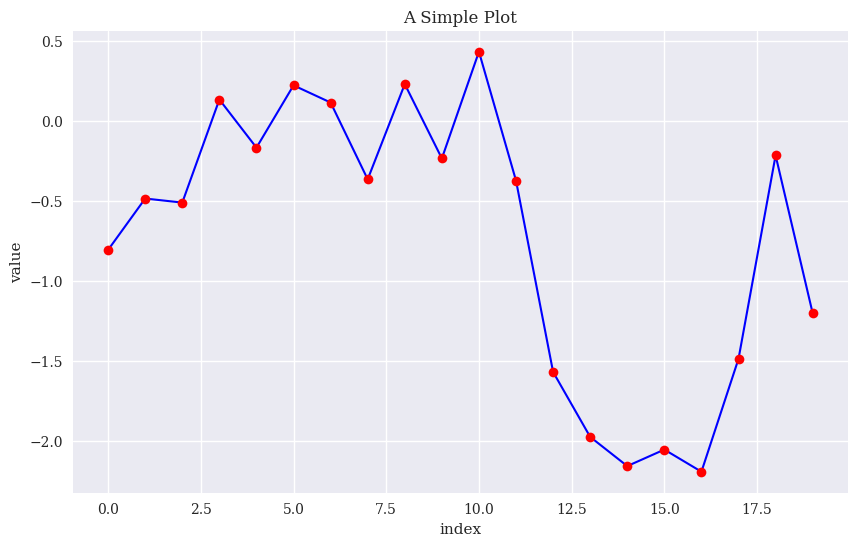

In [15]:
#図のサイズを大きくする(1行目)
#データを線幅1.5ポイントの青い線でプロット(2行目)
#データを赤い（太い）点でプロット(3行目)
#x軸にラベルを付ける(4行目)
#y軸にラベルを付ける(5行目)
#表題を付ける(6行目)
plt.figure(figsize=(10, 6)) 
plt.plot(y.cumsum(),'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

##### カラーコードはどのスタイルの文字とも組み合わせられます。こうして、異なるデータセットを簡単に区別できます。プロットスタイルは凡例にも反映されます。

#### 2次元データセット

##### 1次元データのプロットは特別な場合です。一般にデータセットは複数の別々のサブデータセットからできています。サブデータセットの処理も1次元データのMatplotlibと同じ規則に従います。ただし、そのような場合には、いくつもの問題が生じます。例えば2つのデータセットが同じ座標スケールではプロットできないので、異なるスケールを使わねばなりません。あるいは、2つのデータセットが異なるので、例えば折れ線グラフと棒グラフのように異なるグラフで可視化したくなります。

##### 次のコードは、標準正規分布に従う乱数の形が20x2のNumPyのndarrayオブジェクトとして 2次元のサンプルデータセットを作成します。この配列にメソッド cumsum()を呼び出すと、サンプルデータの累積和を軸0（すなわち第1次元）に沿って計算します。

In [16]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0) 

##### 一般に、このような 2次元配列を plt.plot()に渡せます。自動的に含まれるデータを別のデータセットと解釈します(軸 1、すなわち第2次元に沿って)。それぞれのプロットを図7-7に示します。


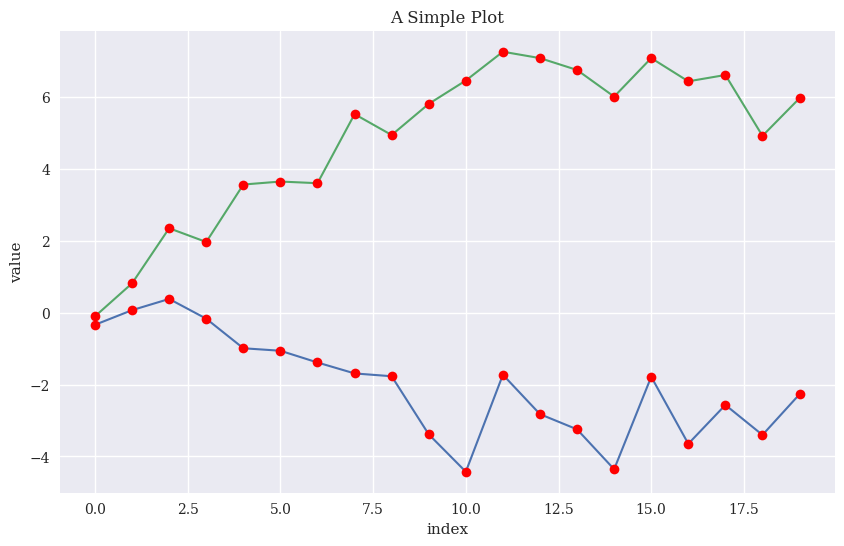

In [17]:
plt.figure(figsize=(10, 6))
plt. plot (y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

##### このような場合、注釈があった方が、プロットを理解しやすくなるかと思います。ラベルを各データセットに貼付して凡例に載せられます。関数 pH.legend()はさまざまな位置引数を取ります。0は最良の位置を意味し、凡例で隠されるデータができるだけ少なくなります。図7-8に2つのデータセットを、今回は凡例付きでプロットします。 ndarrayオブジェクト全体ではなく、2つのサブデータセット (y[: 0]とy[: 1])を別々に処理し、ラベルもそれぞれに付けます。

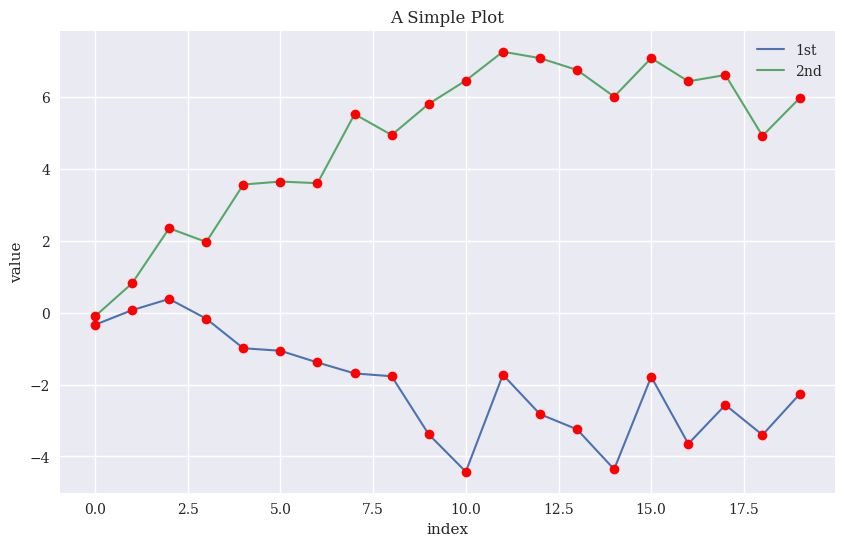

In [18]:
#サブデータセットのラベルを定義(2,3行目)
#凡例は「最良の」位置(5行目)
plt.figure(figsize=(10, 6))
plt. plot (y [:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');


##### 同じ金融リスク要因をシミュレーションしたグラフのように、複数のデータセットを同じようなスケールで1つのy軸を使いプロットできます。 しかし、データセットのスケールが大きく異なると、1つのyスケールでプロットしたのでは可視化情報が失われてしまいます。次の例では2つのサブデータセットのうちの最初のスケールを100倍して、データを再プロットしました（図7-9を参照）。



In [19]:
#1番目のサブデータセットを再スケール(1行目)
y[:, 0] = y[:, 0] * 100

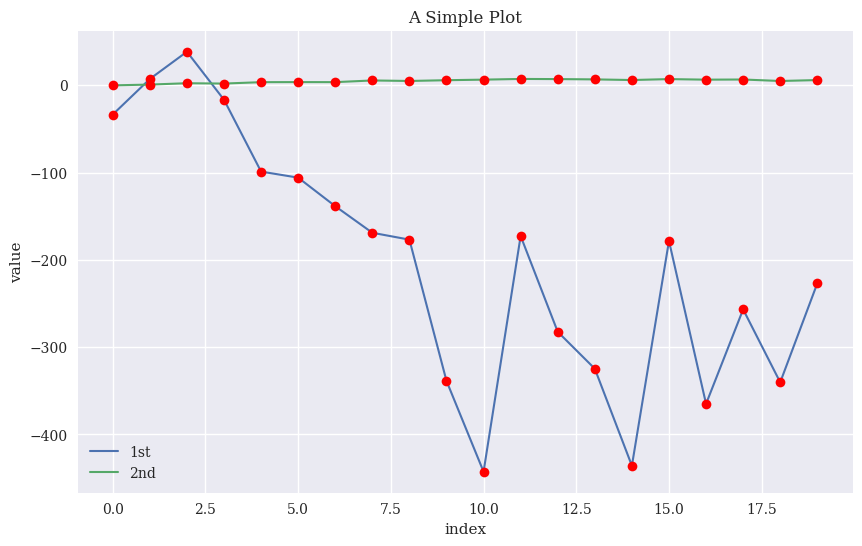

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

##### 図7-9をよく見ると、新しいy軸のスケールで、最初のデータセットは 「読める」のに、第2のデータセットは匝線のようになっています。第2のデータセットの情報が「視覚的に失われて」しまいました。この問題を解決するには基本的に 2つの方法があります。プロットを調整するかデータを調整するか（例：再スケール）です。

##### 2つのy軸（左／右）使用
##### 2つのサブプロット（上／下、左／右）使用

##### 次の例はプロットに第2の軸を導入します。図7-10には2つの異なるy軸があります。左のy軸が1番目のデータセット用、右のy軸が2番目のデータセット用です。その結果、凡例も2つとなります。

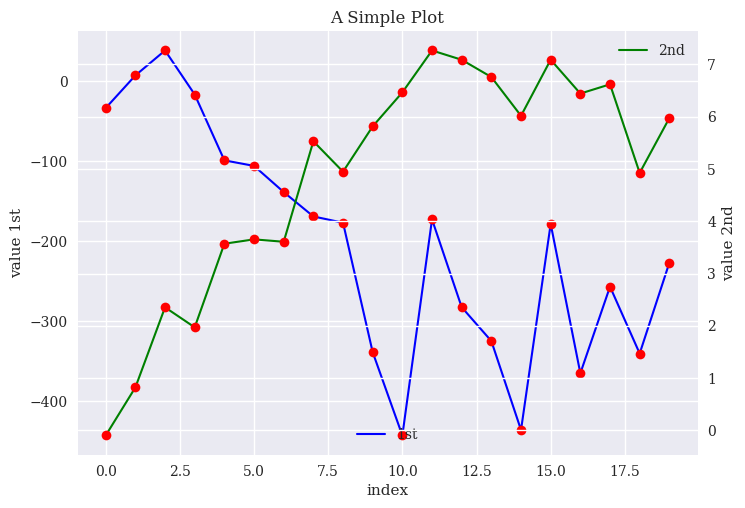

In [21]:
#図および軸オプジェクトを定義(1行目)
#x軸を共有する第2軸オブジェクトを作成(8行目)
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=8)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd');

##### このコードでは軸の処理を行います。
##### fig, ax1 = plt. subplots()
##### ax2 = ax1. twinx()

##### plt.subplots()関数を使うと、基となるプロットオブジェクト（図、サブプロットなど）に直接アクセスできます。例えば、最初のサブプロットとx軸を共有する第2サブプロットを作成できます。図7-10では、2つのサブプロットが互いに重なっています。

##### 次に、2つの別々のサブプロットの場合です。この方式は図7-11からわかるように、2つのデータセットを自由に扱えます。

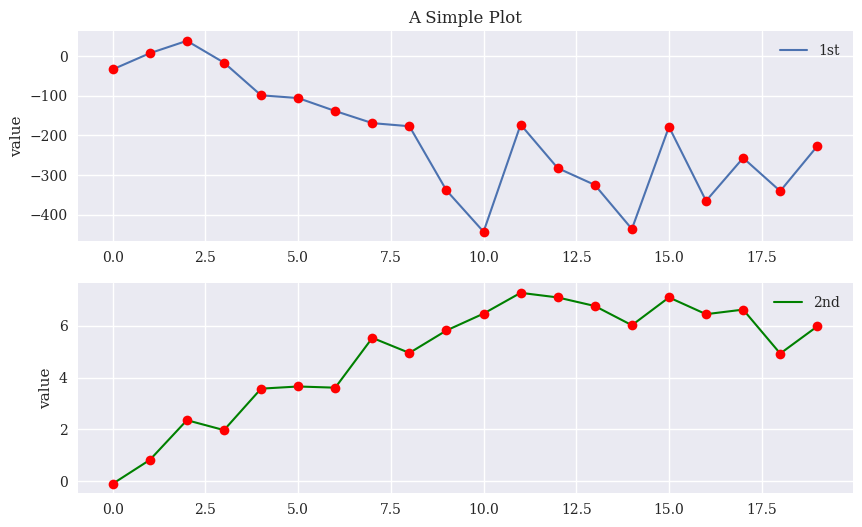

In [22]:
#上のサフプロット1を定義(2行目)
#下のサププロット2を定義(8行目)
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt. plot(y[:, 0], lw=1.5, label='1st') 
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value');

##### Matplotlibのfigureオブジェクトにおけるサブプロットは特別な座標系を使って実現されています。plt.subplot()引数に3つの整数、numrows,numcols,fignum（区切りのカンマはなくてもよい）を取ります。numrowsは行の個数、numcolsは列の個数、fignumはサブプロットの番号、1から numrows* numcolsまでです。例えば9つの同じサイズのサブプロットのfigureはnumrows=3,numcols=3, fignum=l,2,...,9です。右下サブプロットは次の「座標」plt.subplot(3,3,9)です。

##### 2つの異なる種類のプロットでデータを可視化したい、あるいは可視化が必要になることがあります。サブプロット方式ではMatplotlibのどのような種類のプロットでも組み合わせられます。図7-12では折れ線／点グラフを棒グラフと組み合わせています。

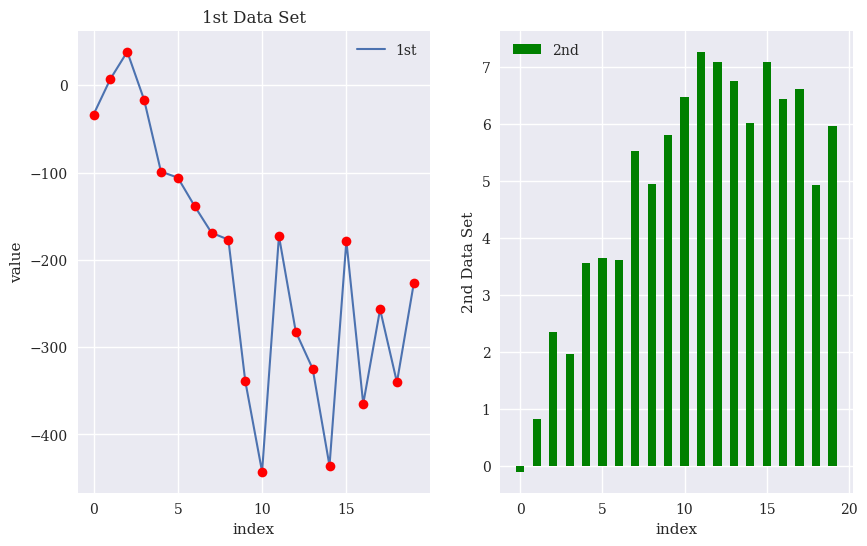

In [23]:
#棒グラフのサブプロットを作成(10,11行目)
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5, color='g', label='2nd')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('2nd Data Set');

#### 他のプロットスタイル

##### 2次元プロットの中では、マーカー付き折れ線グラフがファイナンスではおそらく一番重要でしょう 。多くのデータセットが時系列データであり、一般にマーカー付き折れ線グラフで可視化されるからです。「8章 金融時系列デ＿夕」は金融時系列データを詳細に扱います。本節では乱数の2次元データセットについて、ファイナンスのアプリケーションに役立つ別の可視化方式を述べます。

##### まず散布図を紹介します。1つのデータセットの値を他のデータセットのx値にします。図7-13が散布図です。 この種のプロットは、例えばある金融時系列データの他のデータに対するリターンのプロットに使われます。この例では、さらにデータの多い新しい2次元データセットを使います。

In [24]:
#乱数でより大きなデータセットを作る
y = np.random.standard_normal((1000, 2))

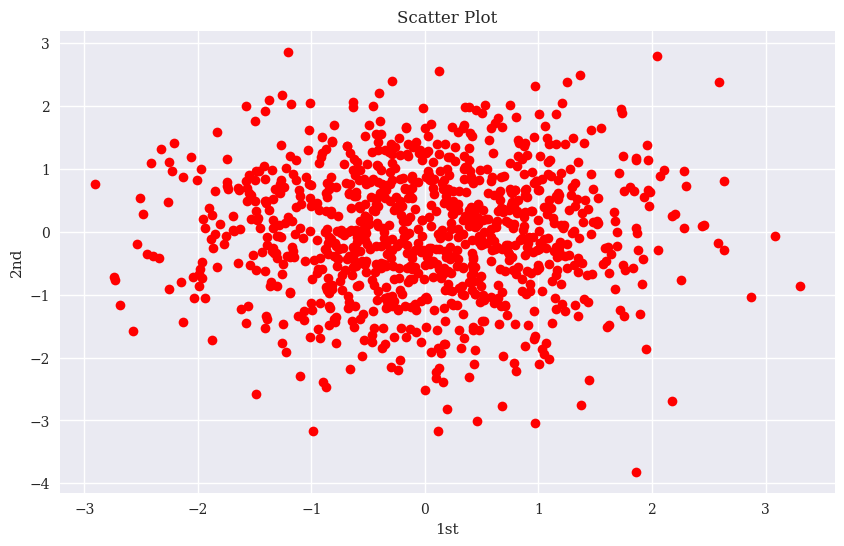

In [25]:
#lt.plot()関数による散布図(2行目)
plt.figure(figsize=(10, 6)) 
plt.plot(y[:, 0], y[:, 1],'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

##### Matplotlibには散布図を作る専用関数があります。基本的に同じように動作しますが追加機能があります。図7-13に対応する散布図を図7-14に示します。今回はplt.scatter()関数で作りました。

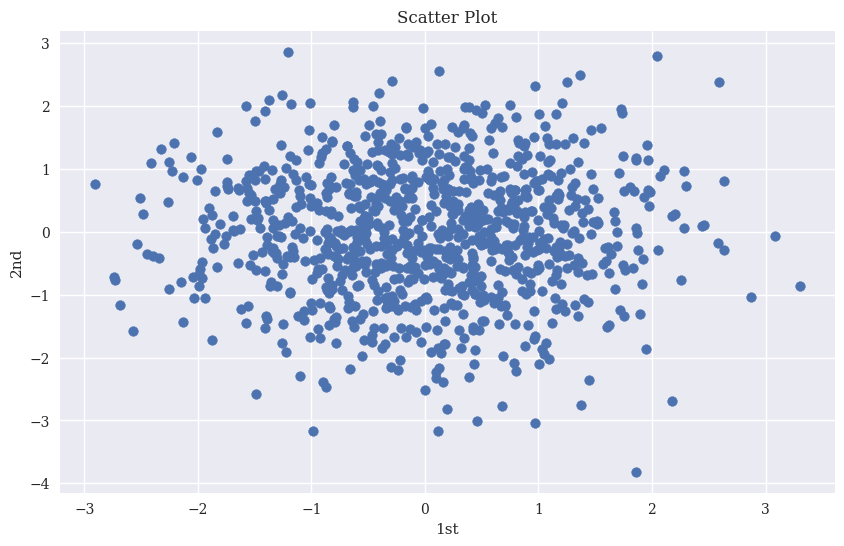

In [26]:
#plt.scatter()関数による散布図(2行目)
plt. figure(figsize=(10, 6))
plt. scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

##### プロット関数 plt.scatter()は3次元目を追加し、異なる色で可視化し、カラーバーを使って記述できます。図7-15では第 3次元が異なる色で示され、カラーバーが凡例になります。そのために、次のコードは0から10の整数値のランダムデータで第3データセットを作ります。

In [27]:
c = np.random.randint(0, 10, len(y))

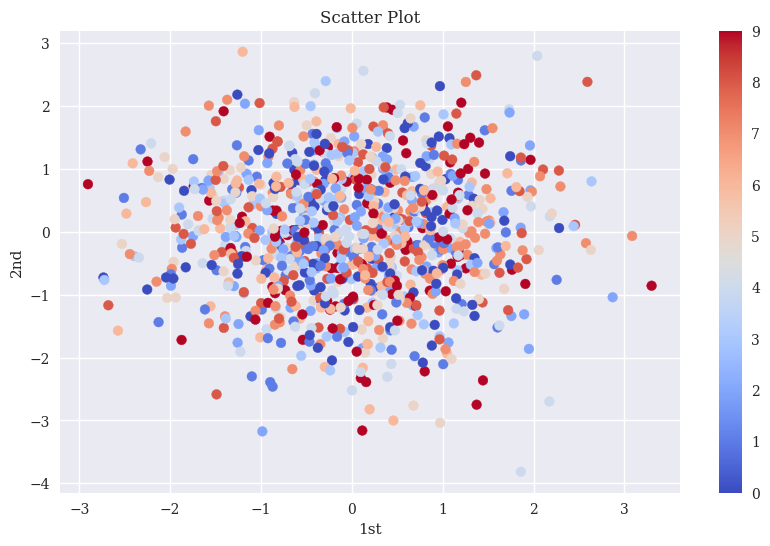

In [28]:
#第3データセットを追加(3行目)
#カラーマップ選択(4行目)
#太い点でマーカーを定義(5行目)
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1],
            c=c,
            cmap='coolwarm',
            marker='o')
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

##### 別のプロット、ヒストグラムもファイナンスのリターンではよく使われます。図7-16に2つのデータセットの度数値を横に並べて同じプロットに表示します。

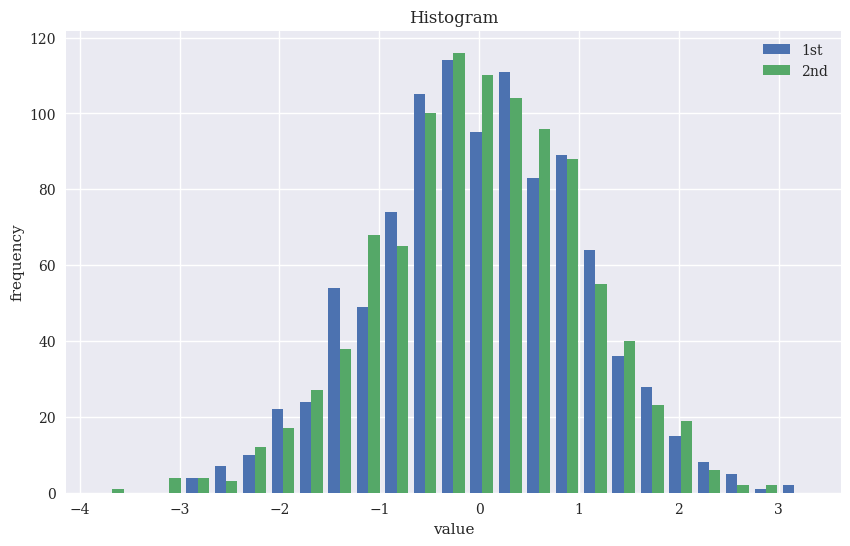

In [29]:
#plt.hist()関数によるヒストグラム(2行目)
plt.figure(figsize=(10, 6))
plt. hist(y, label= ['1st','2nd'], bins=25)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

##### ヒストグラムはファイナンスのアプリケーションで重要なので、plt.hist()の使用法を詳しく述べます。次の例はサポートされている引数を示します。

##### plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)

##### 図7-17は同じようなプロットですが、今度は、2つのデータセットのデータを使った積み上げヒストグラムとなっています。

Text(0.5, 1.0, 'Histogram')

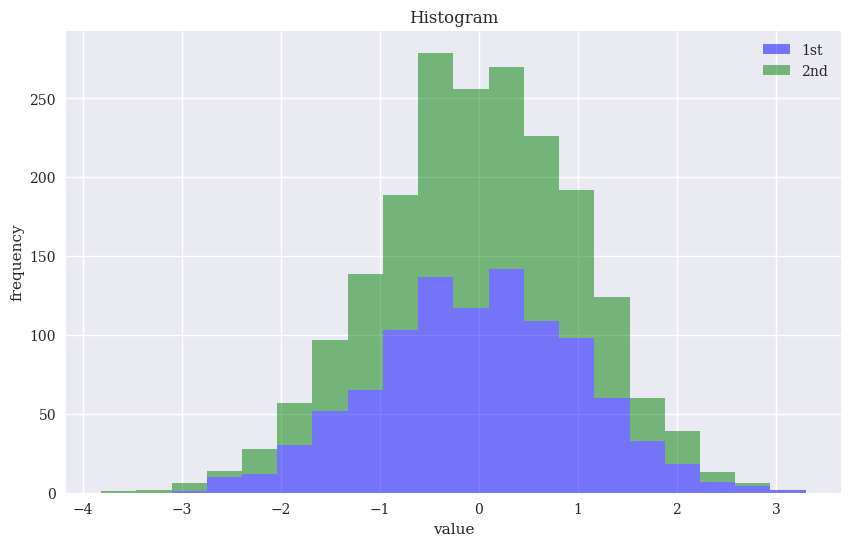

In [30]:
plt. figure(figsize=(10, 6))
plt.hist(y, label=['1st','2nd'], color=['b','g'],
stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt. title('Histogram')

##### 箱ひげ図も役立ちます。ヒストグラムと同様、図7-18のような箱ひげ図ではデータセットの特徴を簡潔に表示し、かつ複数のデータセットを簡単に比較することができます。

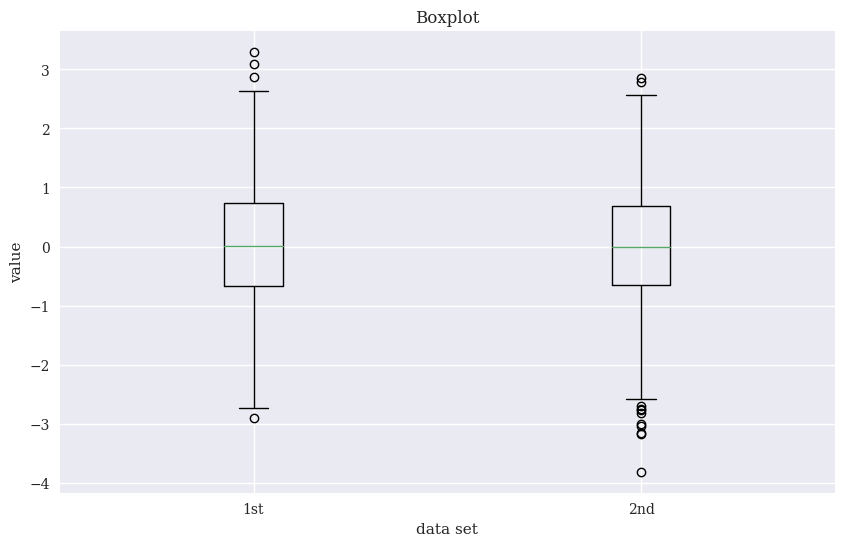

In [31]:
#plt. boxplot()関数による箱ひげ図(2行目)
#個別にxラベルの設定(3行目)
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st','2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot');

##### 最後の例では(一連の)プロットインスタンスの特性を設定する関数 plt.setp()を使います。例えば次のコードで作られる折れ線グラフを考えます。

##### line= plt.plot(data,'r')

##### 次のコードでスタイルを実線から「破線」に変えます。

##### plt.setp(line, linestyle='--')

##### こうして、プロットインスタンス (artistオブジェクト)ができた後でパラメータの変更が簡単にできます。
##### 本節の最後は、 Matplotlibギャラリー(https://www.matplotlib.org/ gallery.html)にある数式のプロットです。上限と下限を指定した関数積分の面積部分を表示します。f(x)をaからbまで積分し、f(x) ＝e^x/2＋1,a=1/2, b＝3/2で行った結果を表示します。図7-19から、MatplotlibがシームレスにLaTeXの数式をプロットに取り込んでいることがわかります。まず、関数定義の後、積分の上下限、そしてx/y値を求めます。

In [32]:
#関数定義(1,2行目)
#積分の上下限(3行目)
#関数プロットのx値(4行目)
#関数プロットのy値(5行目)
#積分のx値(6行目)
#積分のy値(7行目)
#プロットする多角形の座標のタプルからなるlistオプジェクト(8行目)
def func(x): 
    return 0.5 * np.exp(x) + 1
a, b = 0.5, 1.5
x = np.linspace(0, 2)
y = func(x)
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]

##### 次にプロットですが、オブジェクトが多数必要です。

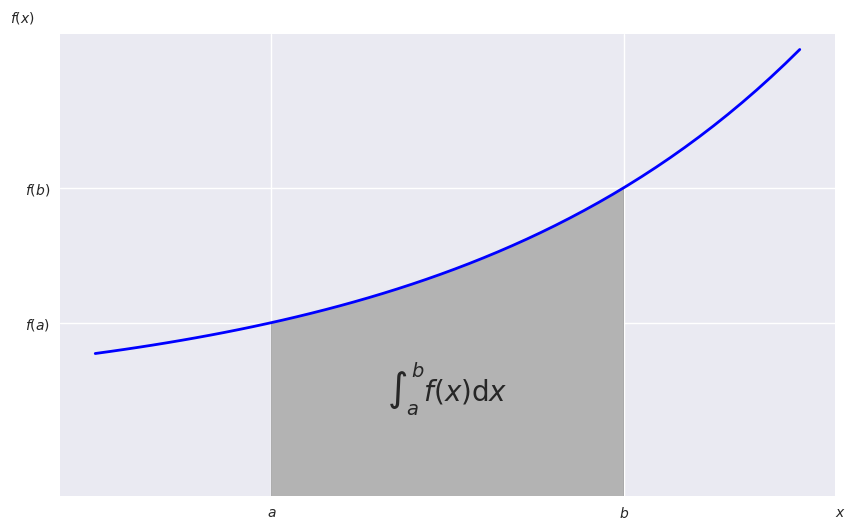

In [33]:
#関数値を青い線でプロット(3行目)
#縦軸の最小y値を定義(4行目)
#多角形（積分領域）を灰色でプロット(5,6行目)
#積分の式を配匿(7,8行目)
#軸ラべルを配置(9,10行目)
#xラベルを配置(11,12行目)
#yラベルを配置(13,14行目)
from matplotlib.patches import Polygon 
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
poly=Polygon(verts,facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)]);
ax.set_yticklabels(('$f(a)$', '$f(b)$'));

### 7.2静的3Dプロット

##### ファイナンスでは 3次元可視化が役立つ領域はそれほど多くはありません。ボラティリティサーフェスの表示が適用例の 1つで、インプライド・ボラティリティを多数の取引オプションの満期や権利行使と同時に表示します。ヨーロピアンコールオプションのバリューサーフェスとベガサーフェスの可視化例については 「付録 B BSMオプションクラス」を参照してください。ボラテ ィリティサーフェスのプロットを作るコードを次に示します。次のような引数です。


##### • 50から150の権利行使価格
##### • 0.5から2.5年の満期

##### NumPyのnp.meshgrid()関数が2つの1次元ndarrayオブジェクトで2次元座標系を作ります。

In [34]:
#権利行使価格のndarrayオプジェクト
strike = np.linspace(50, 150, 24)

In [35]:
#満期値のndarrayオブジェクト
ttm = np.linspace(0.5, 2.5, 24)

In [36]:
#2つの2次元ndarrayオブジェクト(格子)作成
strike, ttm = np.meshgrid(strike, ttm)
strike[ :2].round(1) 

array([[ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ],
       [ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ]])

In [37]:
#ダミーのインプライド・ポラティリティ値
iv= (strike -100) ** 2 / (100 *strike)/ ttm
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

##### 次のコードのプロットを図7-20に示します。

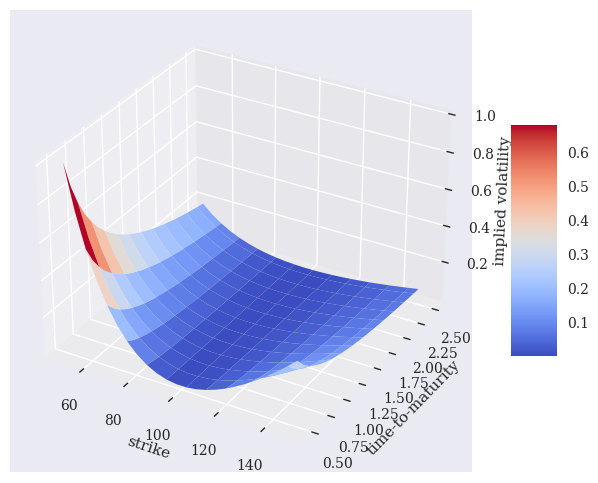

In [38]:
#Axes3Dは直接使わないが関連3Dプロット機能をインポート(1行目)
#3Dプロットキャンバス設定(3行目)
#3Dプロット作成(4、5、6行目)
#x軸ラベル設定(7行目)
#y軸ラベル設定(8行目)
#z軸ラベル設定(9行目)
#カラーバー作成(10行目)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2,cstride=2, 
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                          antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

参考資料　https://resanaplaza.com/2021/08/14/%E3%80%90%E8%B6%85%E7%B0%A1%E5%8D%98%E3%80%91matplotlib%E3%81%A73d-plot-%E3%82%92%E3%83%9E%E3%82%A6%E3%82%B9%E3%81%A7%E3%82%B0%E3%83%AA%E3%82%B0%E3%83%AA%E5%9B%9E%E3%81%9D%E3%81%86%EF%BC%81%EF%BC%88by/

##### 2次元プロットと同様、同じデータの線スタイルを点(実際には三角形)の3D散布図として図7-21のプロットのように、view_init()メソッドを使って異なる視点で示せます。

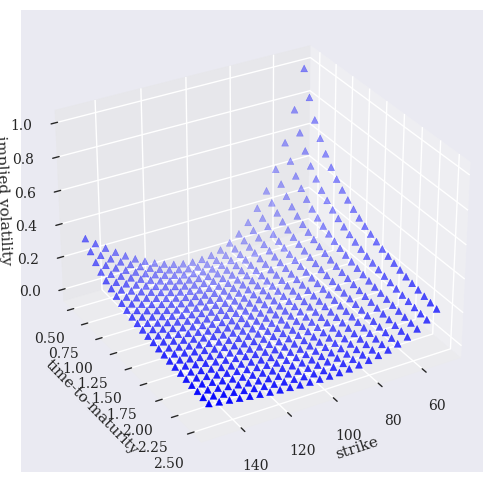

In [39]:
#視点設定(3行目)
#3D散布図作成(4、5行目)
fig=plt.figure(figsize=(10, 6))
ax= fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');

### 7.3 インタラクテイプ2Dプロット

##### Matplotlibは静的ビットマップやPDFフォーマットのプロットを作ります。現在では、D3.js標準に基づいたインタラクティブプロットを作る多くのライブラリがあります。そのようなプロットだとデータを調べるときに、ズームイン／アウト、ホバーエフェクトなどを使うことができます。ウェブページに埋め込むことも一般に可能です。

##### よく使われているプラットフォーム／プロットライブラリがPlotly(http://plot.ly)です。データサイエンス用の可視化に特化しデータサイエンスコミュニティで広く使われています。Plotlyの主な利点はPythonエコシステムにしっかり統合され、pandasのDataFrameオブジェクトやラッパーパッケ ージCufflinks(https://github.com/santosjorge/cufflinks)と組み合わせたときに特に使いやすいことです。

##### 機能によっては無料アカウント(https://plot.ly/accounts/login/?action=login#/)が必要です。認証されれば、ローカルに格納してずっと使うことができます。詳細は「GettingStarted with Plotly for Python Guide」(https://plot.ly/python/getting-started/)を参照してください。

##### 本節ではDataFrameオブジェクトで格納されたデータをCufflinksを主に使ってインタラクティブプロットを作る場合を扱います。


#### 基本プロット

##### Jupyter Notebookで始める前に、インポートとノートブックモードをオンにします。

In [40]:
import pandas as pd

In [41]:
! pip install cufflinks

In [42]:
#Cufflinksをインポート
import cufflinks as cf 

c:\Users\iikkdn\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [43]:
#Plotlyオフラインプロット機能をインポート
import plotly.offline as plyo

In [44]:
#ノートブックプロットモードをオン
plyo.init_notebook_mode(connected=True)

##### 次の例は擬似乱数を使ったDatetimeindex(なわち時系列データ)のDataFrameオブジェクトです。

In [45]:
#標準正規分布に従う乱数
a= np.random.standard_normal((250, 5)).cumsum(axis=0)


In [46]:
#atetimeindexオブジェクトの開始日
#頻度(「営業日次」)
#期間
index= pd.date_range('2019-1-1',
                        freq='B',
                        periods=len(a))

In [47]:
#生データ線形変換
#1文字列ヘッダ
#Datetimeindexオブジェクト
df = pd.DataFrame(100 + 5 * a,
                  columns=list('abcde'),
                  index=index)

In [48]:
#データの先頭5行
df.head()

,a,b,c,d,e
2019-01-01,109.037535,98.693865,104.474094,96.878857,100.621936
2019-01-02,107.598242,97.005738,106.789189,97.966552,100.175313
2019-01-03,101.639668,100.332253,103.183500,99.747869,107.902901
2019-01-04,98.500363,101.208283,100.966242,94.023898,104.387256
2019-01-07,93.941632,103.319168,105.674012,95.891062,86.547934


##### CufflinksがDataFrameクラスにdf.iplot()メソッドを新たに追加します。このメソッドはPlotlyを使いバックエンドでインタラクティブプロットを作ります。本節のサンプルコードはすべて、インタラクティブプロットを静的ビットマップでダウンロードしテキストに埋め込むオプションを使います。Jupyter Notebook環境では、作ったプロットはすべてインタラクティブです。次のコードの結果は図7-22に示します。

In [49]:
#Plotlyのオフライン(ノートフックモード)機能使用(1行目)
#ローカルなプロットと埋め込みのためdf.iplot()メソッドを引数asFigure=Trueで呼び出す(2行目)
#imageオプションで静的ビットマップ版プロット選択(3行目)
#ビットマップを保存するファイル名指定（ファイル拡張子は自動付加）(4行目)
plyo.iplot(
    df.iplot(asFigure=True),
    image='png',
    filename='ply_01')

##### Matplotlibやpandasのプロットと同様に、カスタマイズ用の引数がいくつもあります(図7-23を参照)。

In [50]:
#テーマ（プロットスタイル）
#表題を追加
#x軸ラベル追加
#y軸ラベル追加
#プロットモードを(実線、マーカーなど)列ごとに定義
#列ごとにマーカー記号を定義
#マーカーのサイズ
#色を列ごとに指定
plyo.iplot(
    df[['a','b']].iplot(asFigure=True,
                        theme='polar',
                        title='A Time Series Plot', 
                        xTitle='date',
                        yTitle='value',
                        mode={'a':'markers', 'b':'lines+markers'},
                        symbol={'a':'circle', 'b':'diamond'},
                        size=3.5,
                        colors={'a':'blue', 'b':'magenta'}),
    image='png',
    filename='ply_02')

##### Matplotlibと同様、Plotlyではさまざまな種類のプロットを使えます。Cufflinksでchart,scatter, bar, box, spread, ratio, heatmap, surface, histogram, bubble, bubble3d, scatter3d, scattergeo, ohlc, candle, pie, choroplethという種類があります。折れ線グラフとは異なる例として、ヒストグラムを(図 7-24)示します。

In [51]:
#プロットの種類指定(2行目)
#列ごとにサブプロット(3行目)
#bins引数を設定(4行目)
plyo.iplot(
    df.iplot(kind='hist',
             subplots=True,
             bins=15,
             asFigure=True),
    image='png',
    filename='ply_03')

#### ファイナンスのプロット

##### Plotly、Cufflinks、pandasの組み合わせは金融時系列データを自在に処理できます。Cufflinksにはファイナンス用プロット作成専用機能があり、相対力指数(RSI)のような典型的な金融チャート要素を追加できます。そのためにDataFrameオブジェクトと同じようにプロットできる永続QuantFigオブジェクトをCufflinksで作ります。

##### 実際の金融データセット、EUR/USD為替レート時系列データ（出典： FXCMForex Capital Markets Ltd.）を用います。

In [52]:
#金融データをcsvファイルから読み込む
raw = pd.read_csv('C:\\Users\\iikkdn\\Desktop\\code\\python-for-finance\\fxcm_eur_usd_eod_data.csv',
                  index_col=0, parse_dates=True) 

In [53]:
#結果のDataFrameオブジェクトは複数の列と1500以上のデータ行
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1547 entries, 2013-01-01 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1547 non-null   float64
 1   BidHigh   1547 non-null   float64
 2   BidLow    1547 non-null   float64
 3   BidClose  1547 non-null   float64
 4   AskOpen   1547 non-null   float64
 5   AskHigh   1547 non-null   float64
 6   AskLow    1547 non-null   float64
 7   AskClose  1547 non-null   float64
dtypes: float64(8)
memory usage: 108.8 KB


In [54]:
#DataFrameオブジェクトから4万(Open-High-Low-Close (ローソク足)、OHLC)選択(1行目)
#わずかなテータ行で可視化(2行目)
#テータセットquotesの結果の末尾5行を返す(3行目)
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']].tail()
quotes = quotes.iloc[-60:]
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


##### QuantFigオブジェクトのインスタンス化では、DataFrameオブジェクトを人力として基本的なカスタマイズできます。QuantFigオブジェクトqfに格納されたデータのプロットはqf.iplot()メソッドによります(図7-25)。

In [55]:
#DataFrameオブジェクトをQuantFigコンストラクタに渡す(2行目)
#表題を追加(3行目)
#プロットの中央に凡例を配置(4行目)
#データセットの名前(5行目)
qf = cf.QuantFig(
    quotes,
    title='EUR/USD Exchange Rate',
    legend='top',
    name='EUR/USD'
)

In [56]:
plyo.iplot( 
qf.iplot(asFigure=True), 
image='png', 
filename='qf_01' 
)

##### ボリンジャーバンドのような典型的な金融チャート要素の追加がQuantFigオブジェクトの別のメソッドで可能です(図7-26)。

In [57]:
#ボリンジャーバンドの期間数
#バンド幅に使う標準偏差数
qf.add_bollinger_bands(periods=15,
                       boll_std=2)

In [58]:
plyo.iplot(qf.iplot(asFigure=True), 
image='png', 
filename='qf_02')

##### RSIのようなファイナンス指標をサブプロットで追加できます(図7-27)。

In [59]:
#RSI期間を指定(1行目)
#上下のバンドは表示しない(2行目)
qf.add_rsi(periods=14,
           showbands=False)


In [60]:
plyo.iplot(
qf.iplot(asFigure=True), 
image='png', 
filename='qf_03')

### 7.4 結論

##### Pythonのデータ可視化ではMatplotlibがあらゆる場合の基準です。NumPyやpandasと組み合わせて、基本機能を簡単に使えます。Matplotlibは強力なライブラリですがAPIが少々複雑です。そのため、本章だけではMatplotlibのすべての機能は説明できません。

##### ファイナンスに関する多くの局面で役立つMatplotlibの2D/3Dプロットの基本関数を紹介しました。他の章では可視化の他の例を示します。

##### Cufflinksとともに、Plotlyも紹介しました。一般にDataFrameオブジェクトのメソッド呼び出し1つでインタラクティブD3.jsができるのでとても便利です。詳細はバックエンドで処理されます。さらに、Cufflinksは、ファイナンスでよく使われる指標を持つ典型的なファイナンス用プロットを、QuantFigオブジェクトで簡単に作成できます。

### 7.5 さらに学ぶために

##### Matplotlibのさまざまな教材がオンラインで利用できます。

##### • Matplotlibのホームページ (https://matplotlib.org)。ここから始めるのがよい。
##### • Matplotlibギャラリー (https://matplotlib.org/gallery.html)。多くの役立つ例がある。
##### •2Dプロットチュートリアル (https://matplotlib.org/users/pyplot_tutorial.html)
##### • 3Dプロットチュートリアル (https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)


##### まずMatplotlibギャラリーを当たって適当な例がないかを探し、そのサンプルコードを使ってみるのが一般的でしょう 。
##### PlotlyとCufflinksパッケージの情報もオンラインにあります。

##### • Plotlyのページ (https://plot.ly/python/)
##### • Plotlyを始めるチュートリアル (https://plot.ly/python/getting-started/) 
##### • CufflinksのGitHubページ (https://github.com/santosjorge/cufflinks)